<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149812062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=d2aa9f92fb3c42c9a5a1f02f1bb46948f3f3c4e6b1bd0627a407bb2bdf43f4b8
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.151151,1.817922,0.119199,1.896050,14.109400,12.501204,14.592334,17.549480,2.297257,0.636688,...,0.139077,4.183042,3.877807,3.957756,3.761002,0.429902,6.329356,0.455509,0.936848,0.000663
2014-11-25,12.042452,1.818230,0.119608,1.900697,14.109171,12.529945,14.631312,17.601588,2.299545,0.638592,...,0.138733,4.217106,3.877957,3.974302,3.761041,0.430158,6.358920,0.456135,0.940173,0.000660
2014-11-26,12.036740,1.816898,0.119821,1.906202,14.098477,12.527437,14.663663,17.631128,2.296651,0.639657,...,0.138628,4.220722,3.875657,3.994129,3.757289,0.430619,6.380556,0.456335,0.941593,0.000659
2014-11-27,12.051625,1.822978,0.119911,1.902110,14.136215,12.466662,14.656892,17.617532,2.302182,0.638377,...,0.138999,4.216745,3.886138,3.988211,3.767347,0.431377,6.408076,0.457557,0.944114,0.000661
2014-11-28,12.071202,1.828321,0.119440,1.908506,14.189501,12.424021,14.700733,17.670189,2.309945,0.640188,...,0.139729,4.238835,3.900787,4.003245,3.781044,0.432211,6.392243,0.458021,0.947926,0.000666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02,13.967349,2.774849,0.144276,1.953994,21.715711,15.795349,23.974841,23.056654,2.968348,0.943828,...,0.076739,5.189559,5.966674,4.644774,5.791783,0.604558,0.766706,0.670093,0.593812,0.000891
2023-11-03,13.997125,2.753847,0.144057,1.973680,21.639733,15.749720,23.977192,23.101347,2.960650,0.942874,...,0.076186,5.220306,5.945798,4.628523,5.768442,0.604631,0.761847,0.667749,0.591735,0.000888
2023-11-05,14.025128,2.755144,0.144120,1.974438,21.628101,15.752254,23.988742,23.106480,2.960183,0.942725,...,0.076145,5.217499,5.941786,4.671064,5.765341,0.604306,0.761438,0.667390,0.591416,0.000888


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== BRL ========================================
2023-11-08 06:43:34,129 - Unknown integration target: 
2023-11-08 06:43:40,217 - Unknown integration target: 
2023-11-08 06:43:46,637 - Unknown integration target: 
2023-11-08 06:43:52,855 - Unknown integration target: 
2023-11-08 06:43:58,859 - Unknown integration target: 
2023-11-08 06:44:12,090 - Unknown integration target: 
2023-11-08 06:44:25,918 - Unknown integration target: 
2023-11-08 06:44:39,607 - Unknown integration target: 
2023-11-08 06:44:41,687 - Unknown integration target: 
2023-11-08 06:44:41,690 - Unknown integration target: 
2023-11-08 06:44:47,817 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 264.6 MiB
2023-11-08 06:44:47,822 - ApiComposer - Initial pipeline was fitted in 4.0 sec.
2023-11-08 06:44:47,825 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-08 07:18:14,246 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [33:26<?, ?gen/s]

2023-11-08 07:18:14,296 - ApiComposer - Hyperparameters tuning started with 20 min. timeout


2023-11-08 07:19:36,912 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 12, 'nodes': [rfr, gbr, ridge, ridge, glm, data_source_ts/BRL, ridge, lagged, ridge, decompose, linear, decompose]}
rfr - {'n_jobs': -1}
gbr - {}
ridge - {'alpha': 5.210711103341477}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/BRL - {}
ridge - {}
lagged - {'window_size': 12.936017015816455}
ridge - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.023
  0%|          | 17/100000 [06:03<1444:09:40, 52.00s/trial, best loss: 0.028851380611942912]
2023-11-08 07:41:34,931 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [rfr, gbr, ridge, ridge, glm, data_source_ts/BRL, ridge, lagged, ridge, decompose, linear, decompose]}
rfr - {'n_jobs': -1}
gbr - {}
ridge - {'alpha': 5.210711103341477}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/BRL - {}
ridge - {}
lagged - {'window_size': 12.936017015816455}
ridge - {}
decompos

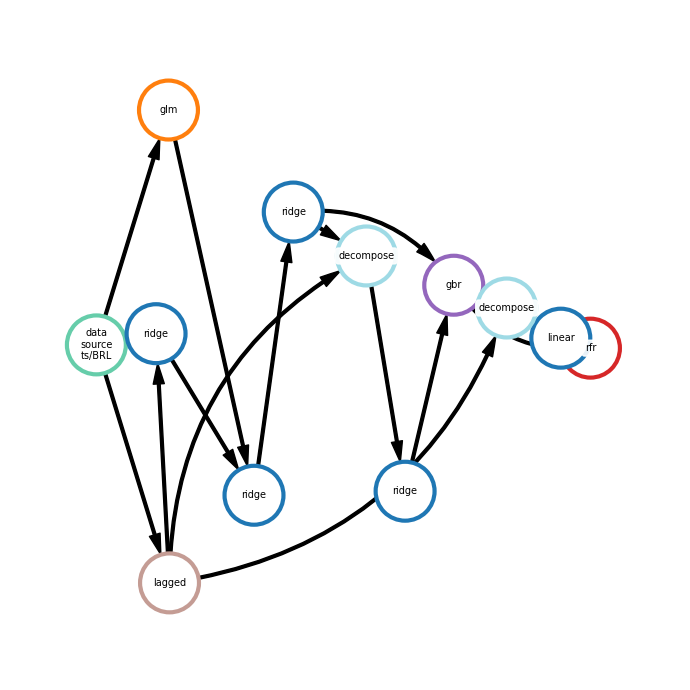

[3.42554866 3.43523625 3.44767199 3.45413582 3.4537426  3.45557222
 3.45156416 3.45114282 3.44979856 3.44201875 3.4355433  3.43444135
 3.43386813 3.43404706 3.44025484 3.44743289 3.45238273]
{'mae': 0.112, 'mape': 0.034}


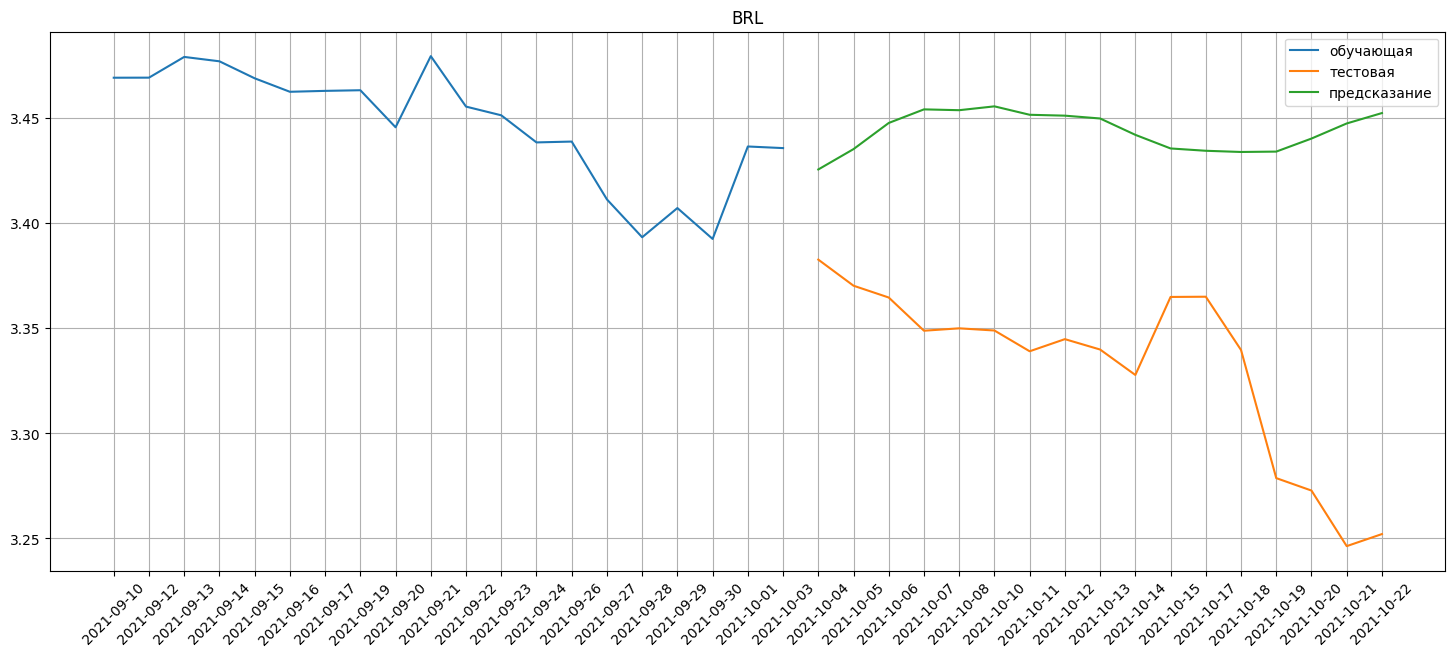


======================================== EUR ========================================
2023-11-08 07:44:17,229 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.8 MiB
2023-11-08 07:44:17,253 - ApiComposer - Initial pipeline was fitted in 11.2 sec.
2023-11-08 07:44:17,256 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 07:44:17,289 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 20 min. Set of candidate models: ['stl_arima', 'ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'clstm', 'gaussian_filter', 'locf', 'smoothing', 'polyfit', 'lagged', 'ets', 'ts_naive_average', 'arima', 'stl_arima', 'lasso', 'diff_filter', 'isolation_forest_reg', 'dtreg', 'smoothing', 'lagged', 'ransac_non_lin_reg', 'rfr', 'ar', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'svr', 'poly_features', 'exog_ts', 'ts_naive_average', 'gaussian_filter',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-08 07:56:20,694 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:03<?, ?gen/s]

2023-11-08 07:56:20,724 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-08 07:56:54,073 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 4, 'nodes': [lgbmreg, fast_ica, lagged, data_source_ts/EUR]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
fast_ica - {'whiten': 'unit-variance'}
lagged - {'window_size': 10}
data_source_ts/EUR - {} 
Initial metric: 0.120
  0%|          | 11/100000 [00:50<1401:07:08, 50.45s/trial, best loss: 0.11776436699893605]
2023-11-08 08:04:51,945 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [lgbmreg, fast_ica, lagged, data_source_ts/EUR]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'reg_alpha': 0.005952971143881955, 'reg_lambda': 0.00040907639157182854}
fast_ica - {'whiten': 'unit-variance', 'fun': 'logcosh', 'n_components': 10}
lagged - {'window_size': 10}
data_source_ts/EUR - {}
2023-11-08 08:04:51,949 - Pi

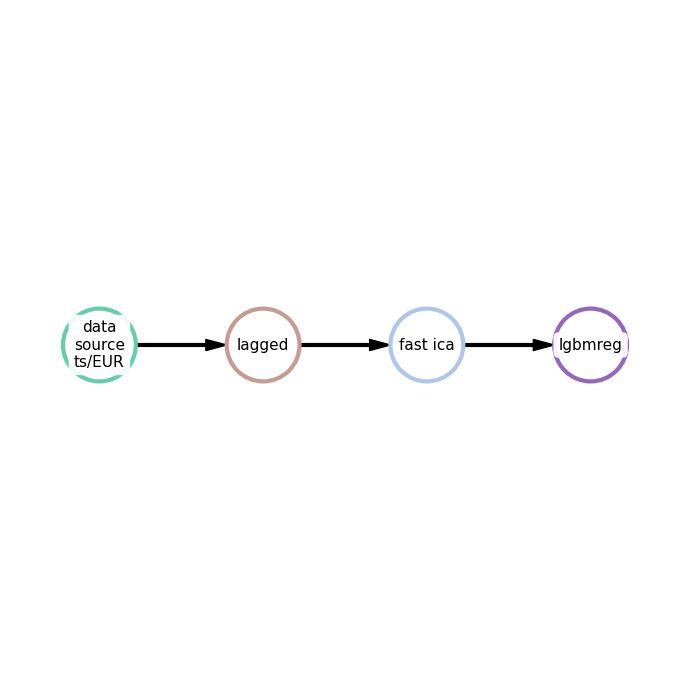

[20.44187795 20.48314967 20.45604535 20.45636466 20.45602664 20.43169898
 20.48755627 20.42869473 20.40243771 20.46023447 20.48774759 20.45109251
 20.46972135 20.4671027  20.47229658 20.47615268 20.45387762 20.45932815
 20.45768142]
{'mae': 0.29, 'mape': 0.014}


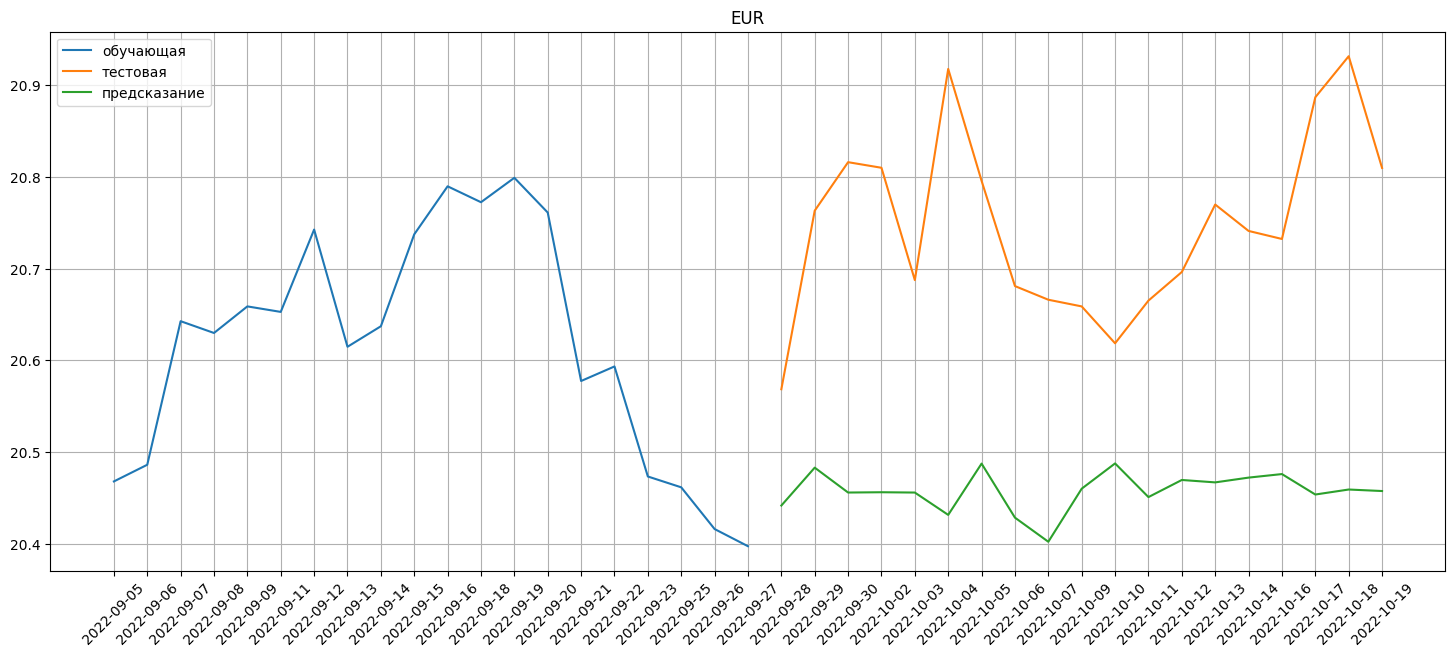


======================================== CLP ========================================
2023-11-08 08:05:47,391 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.5 MiB
2023-11-08 08:05:47,404 - ApiComposer - Initial pipeline was fitted in 7.5 sec.
2023-11-08 08:05:47,407 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 08:05:47,423 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 12 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-08

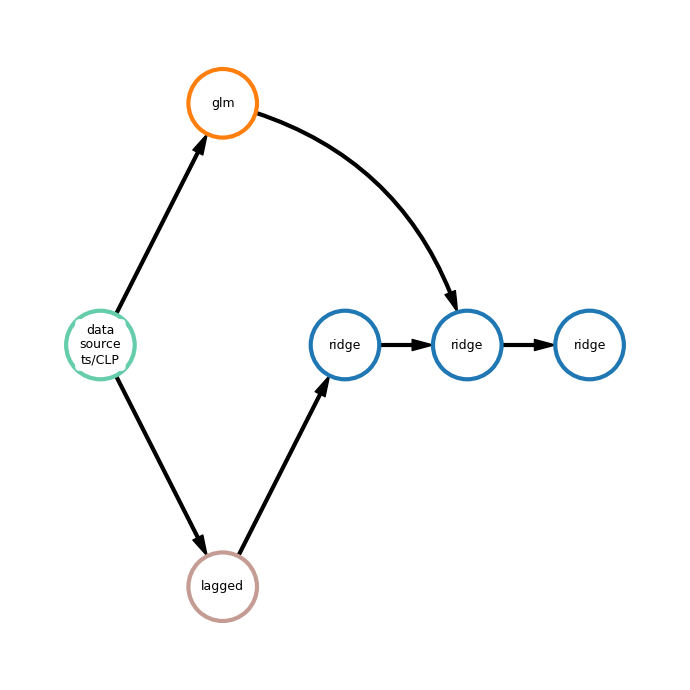

[0.0247563  0.02475743 0.02475848 0.02475952 0.02476051 0.02476128
 0.02476177 0.02476249 0.02476319 0.02476389 0.02476463 0.02476524
 0.02476615 0.02476717 0.02476798 0.02476877]
{'mae': 0.0, 'mape': 0.017}


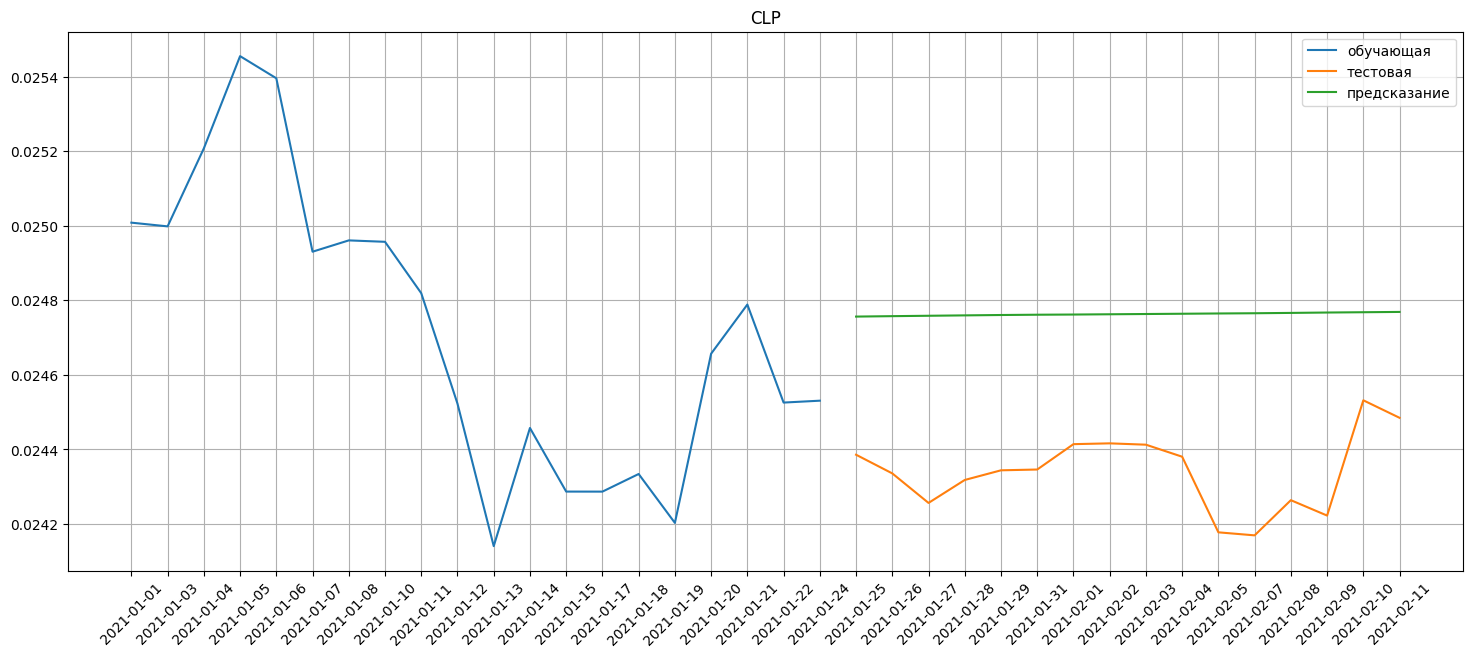


======================================== KRW ========================================
2023-11-08 08:18:13,955 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.9 MiB
2023-11-08 08:18:13,971 - ApiComposer - Initial pipeline was fitted in 12.3 sec.
2023-11-08 08:18:13,979 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 08:18:13,998 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 13 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-0

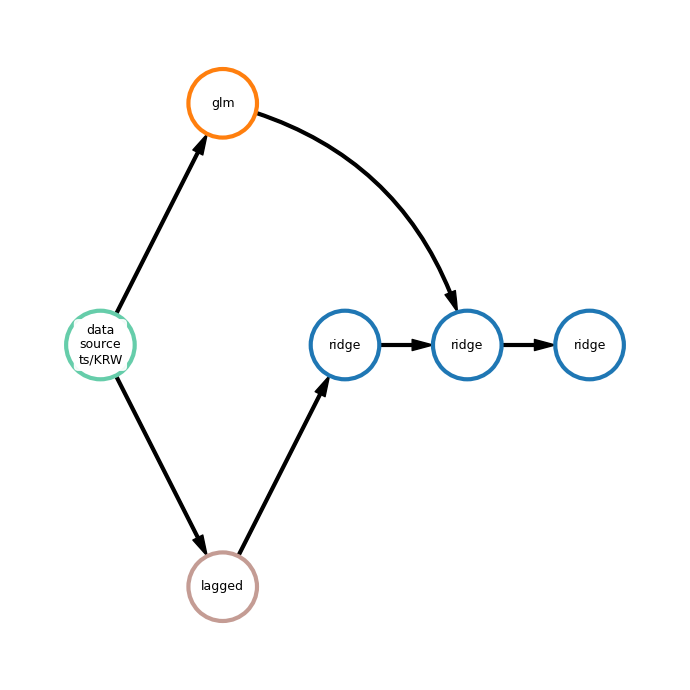

[0.0152458  0.01524688 0.01524793 0.015249   0.0152501  0.01525127
 0.01525244 0.0152537  0.0152549  0.0152561  0.01525726 0.01525842
 0.01525958]
{'mae': 0.001, 'mape': 0.077}


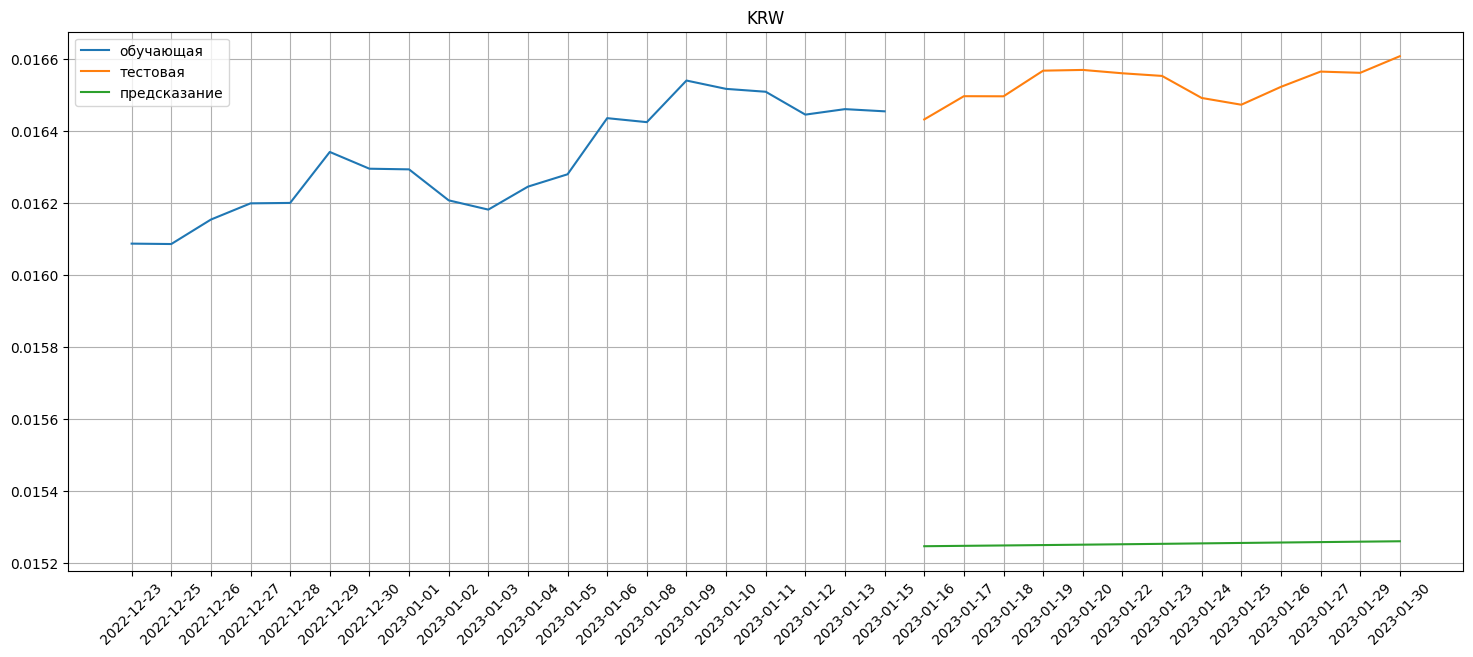


======================================== TWD ========================================
2023-11-08 08:32:01,485 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.8 MiB
2023-11-08 08:32:01,494 - ApiComposer - Initial pipeline was fitted in 12.9 sec.
2023-11-08 08:32:01,498 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 08:32:01,522 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 21 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-0

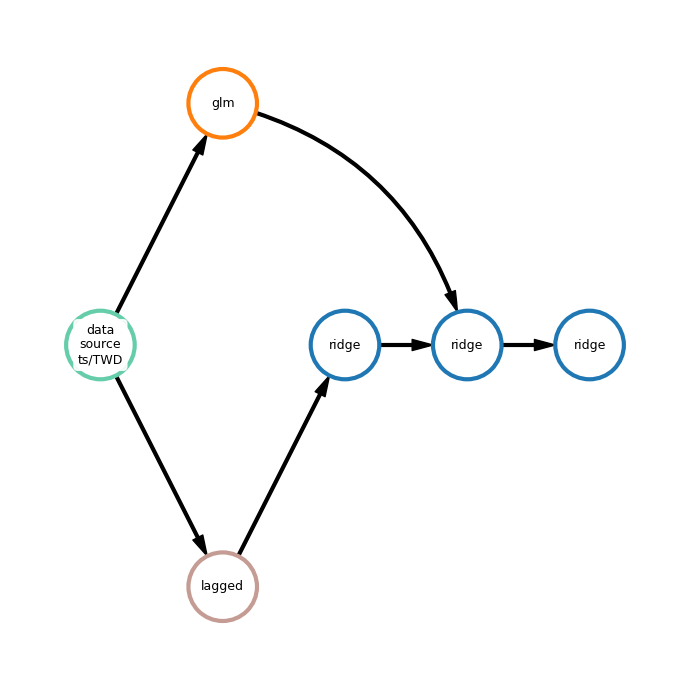

[0.67368255 0.67373759 0.67379445 0.67384743 0.67389873 0.67395535
 0.67401035 0.67406932 0.67412444 0.67418217 0.67423661 0.67429201
 0.67434796 0.67440142 0.67445549 0.67451027 0.6745654  0.6746236 ]
{'mae': 0.005, 'mape': 0.008}


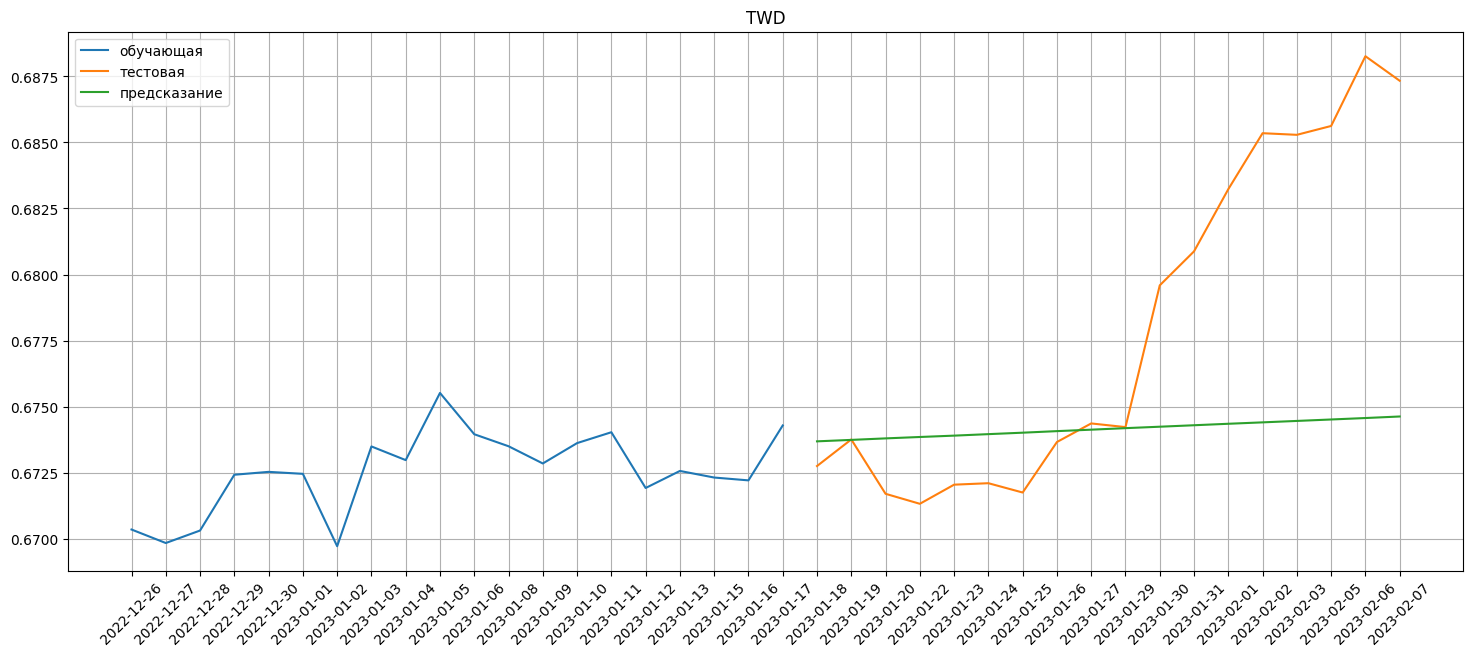


======================================== INR ========================================
2023-11-08 08:53:29,996 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.2 MiB
2023-11-08 08:53:30,000 - ApiComposer - Initial pipeline was fitted in 9.2 sec.
2023-11-08 08:53:30,003 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 08:53:30,022 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 19 min. Set of candidate models: ['stl_arima', 'ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'clstm', 'gaussian_filter', 'locf', 'smoothing', 'polyfit', 'lagged', 'ets', 'ts_naive_average', 'arima', 'stl_arima', 'lasso', 'diff_filter', 'isolation_forest_reg', 'dtreg', 'smoothing', 'lagged', 'ransac_non_lin_reg', 'rfr', 'ar', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'svr', 'poly_features', 'exog_ts', 'ts_naive_average', 'gaussian_filter', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 09:03:49,641 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:19<?, ?gen/s]

2023-11-08 09:03:49,681 - ApiComposer - Hyperparameters tuning started with 9 min. timeout


2023-11-08 09:04:12,264 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/INR, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.001
  0%|          | 18/100000 [04:27<928:18:20, 33.43s/trial, best loss: 0.0004954620286327562]
2023-11-08 09:13:13,252 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/INR, ridge, lagged, linear, decompose]}
linear - {}
ridge - {'alpha': 7.42914671979145}
ridge - {'alpha': 4.829938452984194}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/INR - {}
ridge - {'alpha': 0.5603493389104358}
lagged - {'window_size': 189}
linear - {}
decompose - {}
2023-11-08 09:13:13,257 - PipelineTuner - Final metric: 0.000
2023-11-08 09:13:13,261 - ApiComposer - Hyperp

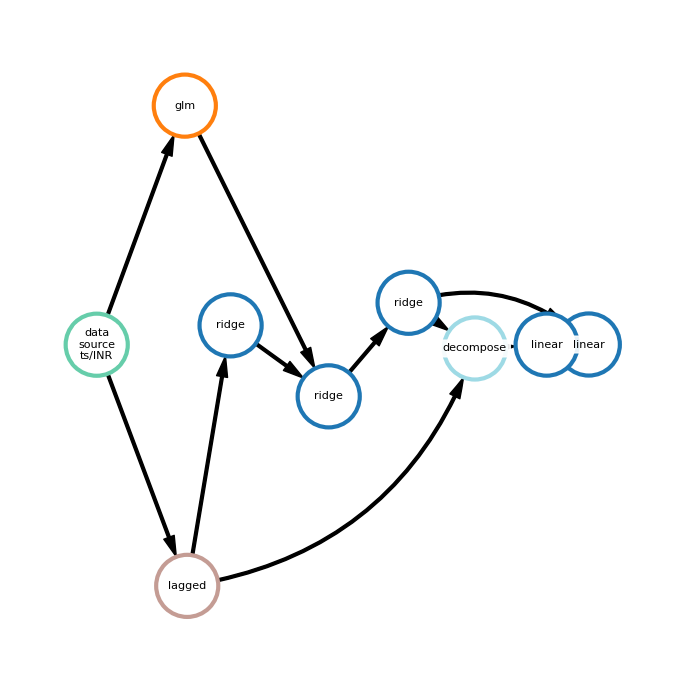

[0.25307274 0.25306797 0.25318146 0.25318718]
{'mae': 0.001, 'mape': 0.003}


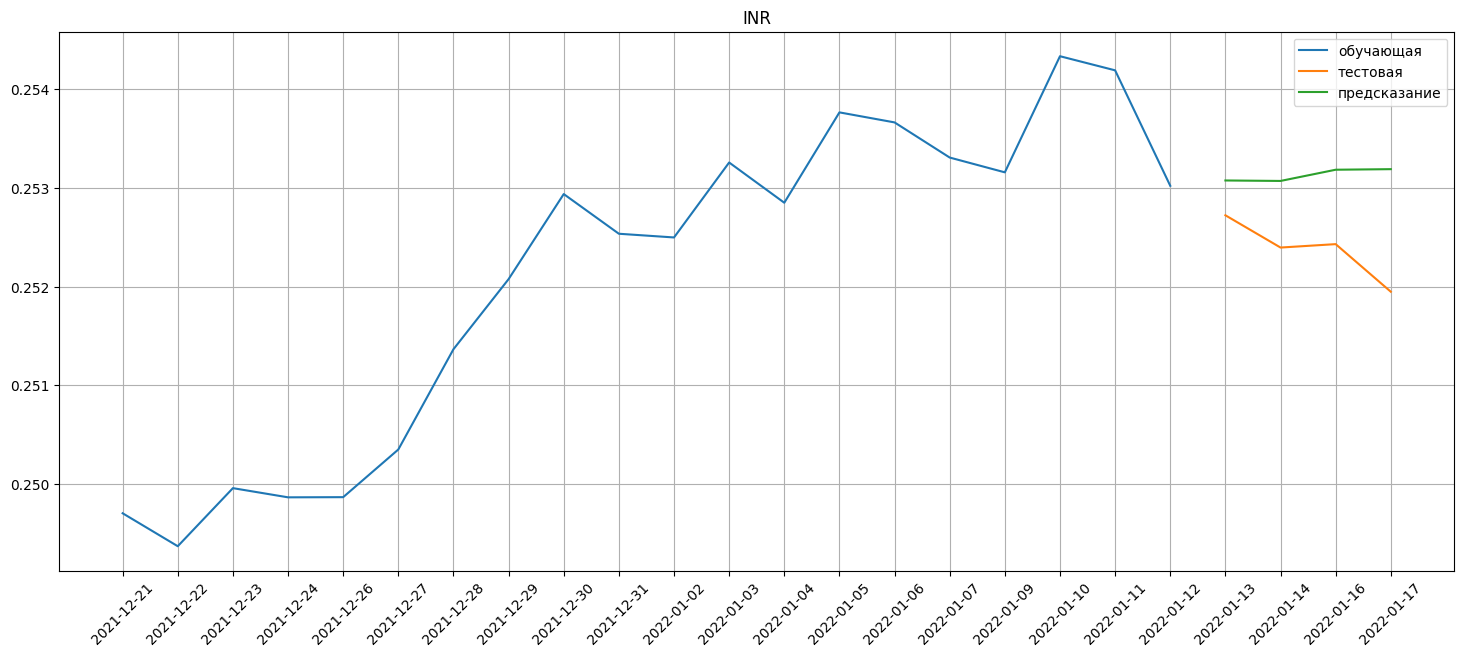


======================================== RUB ========================================
2023-11-08 09:14:07,473 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.5 MiB
2023-11-08 09:14:07,478 - ApiComposer - Initial pipeline was fitted in 18.0 sec.
2023-11-08 09:14:07,482 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 09:14:07,503 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 59 min. Set of candidate models: ['stl_arima', 'ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'clstm', 'gaussian_filter', 'locf', 'smoothing', 'polyfit', 'lagged', 'ets', 'ts_naive_average', 'arima', 'stl_arima', 'lasso', 'diff_filter', 'isolation_forest_reg', 'dtreg', 'smoothing', 'lagged', 'ransac_non_lin_reg', 'rfr', 'ar', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'svr', 'poly_features', 'exog_ts', 'ts_naive_average', 'gaussian_filter',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 09:41:15,568 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [27:08<?, ?gen/s]

2023-11-08 09:41:15,593 - ApiComposer - Hyperparameters tuning started with 32 min. timeout


2023-11-08 09:41:35,286 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/RUB, gbr, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/RUB - {}
gbr - {}
lagged - {'window_size': 10} 
Initial metric: 0.002
  0%|          | 33/100000 [27:26<1987:16:54, 71.57s/trial, best loss: 0.004532940767867531]
2023-11-08 10:13:46,926 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/RUB, gbr, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/RUB - {}
gbr - {}
lagged - {'window_size': 10}
2023-11-08 10:13:46,930 - PipelineTuner - Final metric: 0.002
2023-11-08 10:13:46,937 - ApiComposer - Hyperparameters tuning finished
2023-11-08 10:13:47,400 - ApiComposer - Model generation finished
2023-11-08 10:14:10,983 - FEDOT logger - Final pipeline was fitted
2023-11-08 10:14:10,994 - FEDOT logger - Final pipeline: {'depth': 5, '

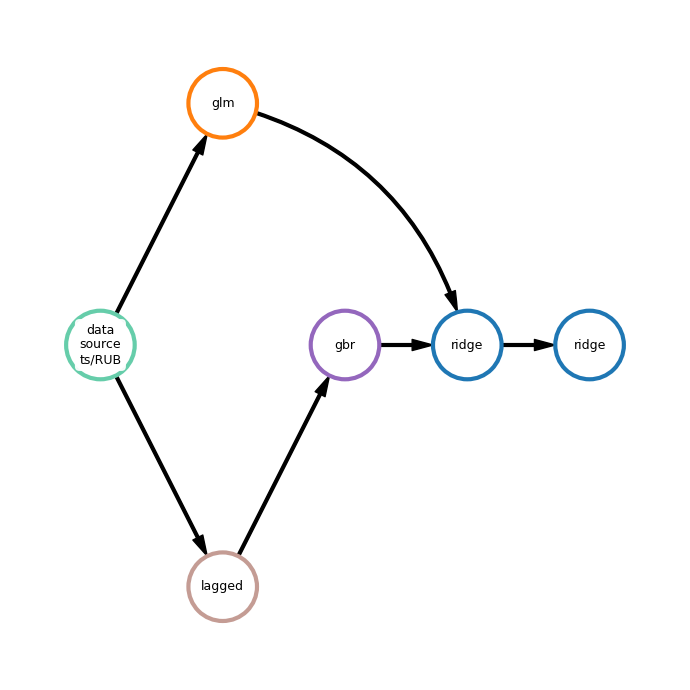

[0.23208155 0.23208421 0.23211258 0.23217307 0.23224272 0.23234155
 0.23249277 0.23266913 0.23287248]
{'mae': 0.008, 'mape': 0.037}


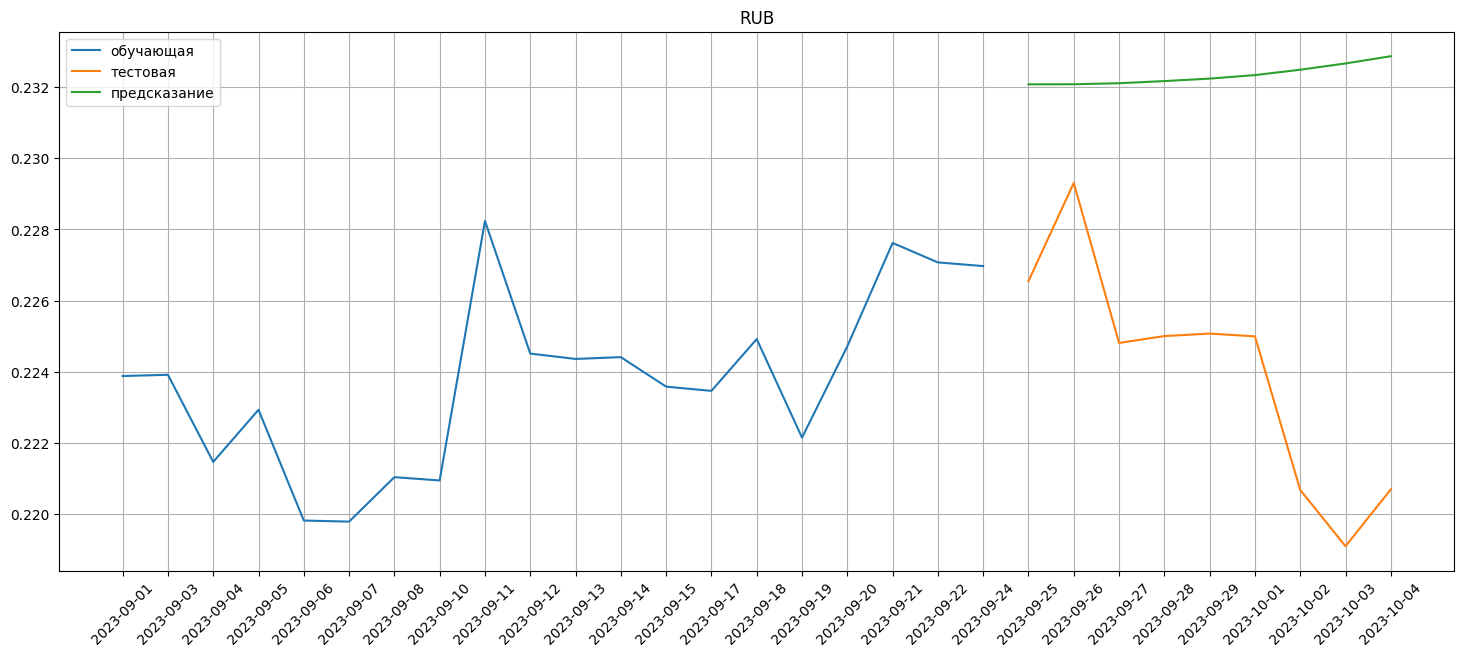


======================================== MXN ========================================
2023-11-08 10:14:33,372 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.4 MiB
2023-11-08 10:14:33,378 - ApiComposer - Initial pipeline was fitted in 16.7 sec.
2023-11-08 10:14:33,384 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 10:14:33,406 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 7 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-08

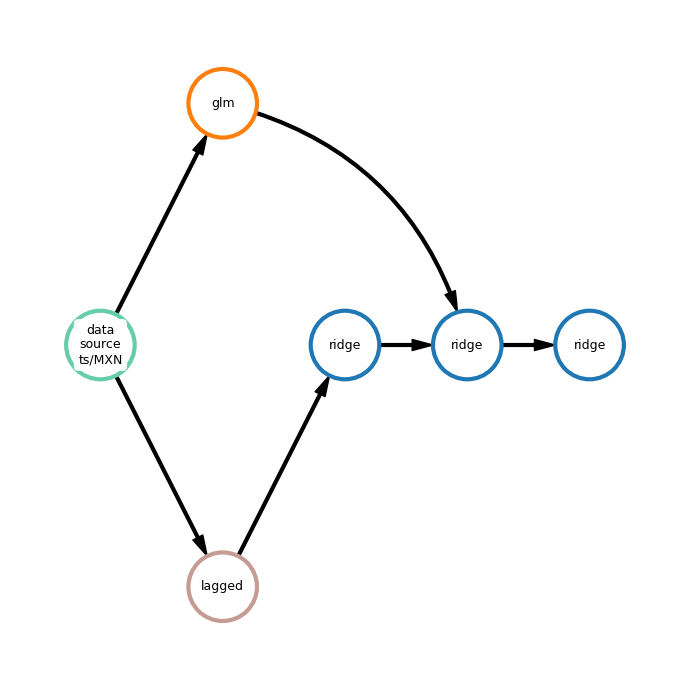

[1.24482077 1.24514613 1.24543973 1.24571112 1.24593755 1.24607245
 1.24630071 1.24651963 1.24674859 1.24698389 1.24721835 1.2474122
 1.24767071 1.24791521]
{'mae': 0.018, 'mape': 0.014}


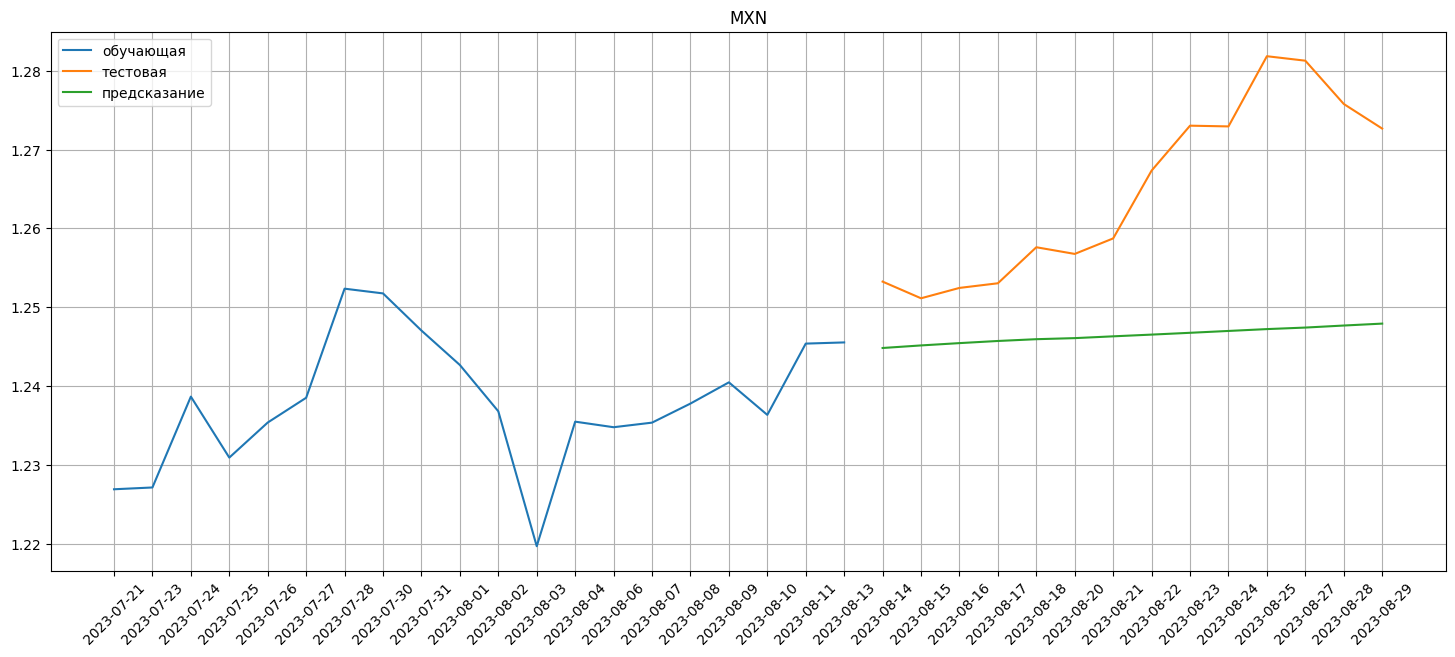


======================================== CNY ========================================
2023-11-08 10:22:05,061 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.9 MiB
2023-11-08 10:22:05,066 - ApiComposer - Initial pipeline was fitted in 14.5 sec.
2023-11-08 10:22:05,070 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 10:22:05,096 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 30 min. Set of candidate models: ['stl_arima', 'ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'clstm', 'gaussian_filter', 'locf', 'smoothing', 'polyfit', 'lagged', 'ets', 'ts_naive_average', 'arima', 'stl_arima', 'lasso', 'diff_filter', 'isolation_forest_reg', 'dtreg', 'smoothing', 'lagged', 'ransac_non_lin_reg', 'rfr', 'ar', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'svr', 'poly_features', 'exog_ts', 'ts_naive_average', 'gaussian_filter',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 10:40:13,181 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [18:08<?, ?gen/s]

2023-11-08 10:40:13,204 - ApiComposer - Hyperparameters tuning started with 12 min. timeout


2023-11-08 10:40:21,915 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/CNY, ridge, lagged]}
ridge - {'alpha': 6.852979881762501}
ridge - {}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/CNY - {}
ridge - {'alpha': 1.9427580080140672}
lagged - {'window_size': 10} 
Initial metric: 0.018
  0%|          | 58/100000 [09:53<343:27:43, 12.37s/trial, best loss: 0.012667432995100618]
2023-11-08 10:52:06,075 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/CNY, ridge, lagged]}
ridge - {'alpha': 8.163478345074385}
ridge - {'alpha': 4.352653800734916}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/CNY - {}
ridge - {'alpha': 5.410075087321428}
lagged - {'window_size': 457}
2023-11-08 10:52:06,079 - PipelineTuner - Final metric: 0.013
2023-11-08 10:52:06,085 - ApiComposer - Hyperparameters tuning finished
2023-11-08 10:52:06,514

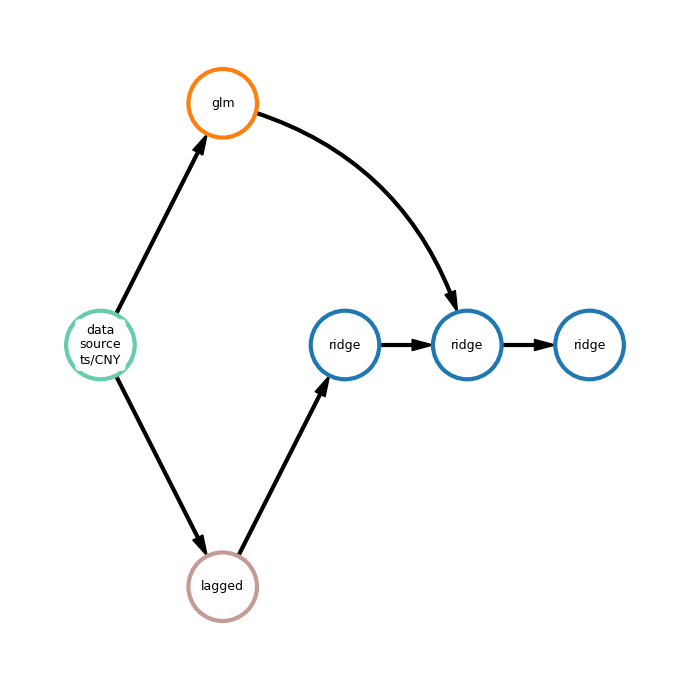

[3.00956589 3.00991608 3.01027385 3.01062755 3.01096652 3.0113035
 3.01165503 3.01200474 3.01234948 3.01267355 3.01297142 3.01326511
 3.01355894 3.01386827 3.01419834 3.01450655 3.0148025  3.01509482]
{'mae': 0.019, 'mape': 0.006}


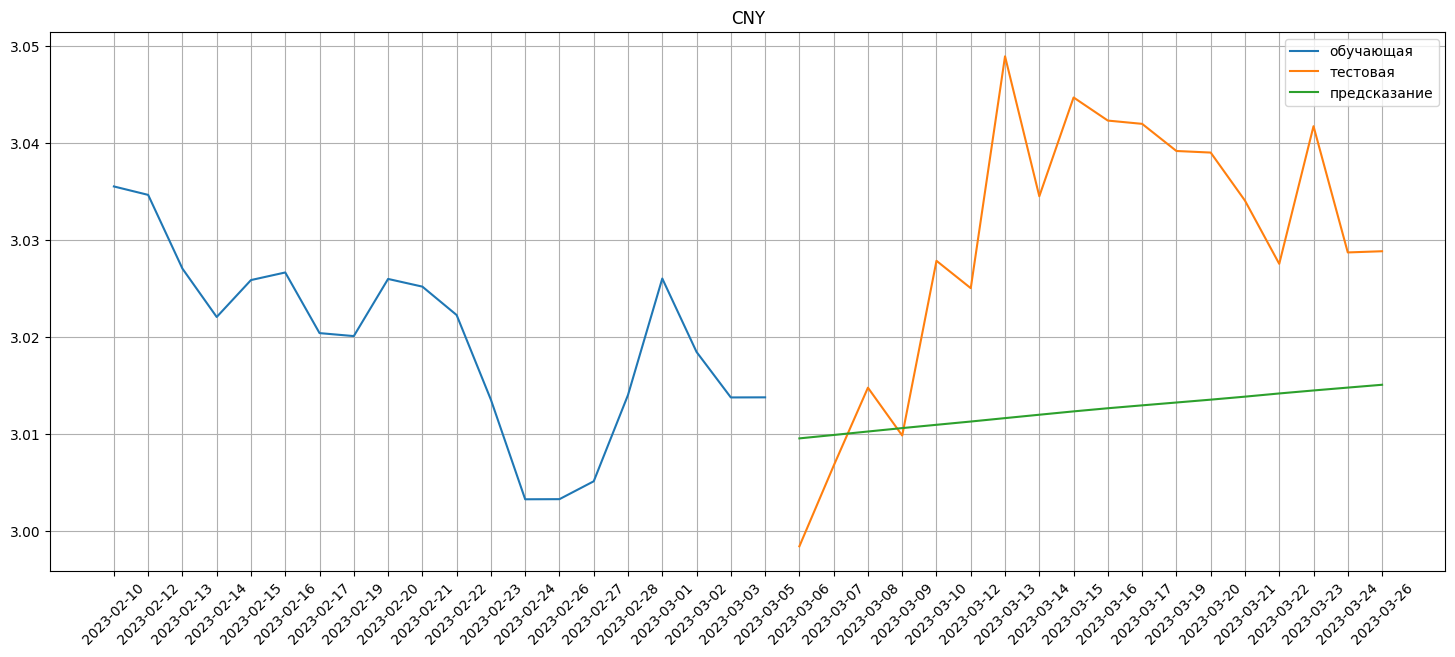


======================================== KWD ========================================
2023-11-08 10:52:40,222 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.0 MiB
2023-11-08 10:52:40,229 - ApiComposer - Initial pipeline was fitted in 7.8 sec.
2023-11-08 10:52:40,232 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 10:52:40,256 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 60 min. Set of candidate models: ['stl_arima', 'ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'clstm', 'gaussian_filter', 'locf', 'smoothing', 'polyfit', 'lagged', 'ets', 'ts_naive_average', 'arima', 'stl_arima', 'lasso', 'diff_filter', 'isolation_forest_reg', 'dtreg', 'smoothing', 'lagged', 'ransac_non_lin_reg', 'rfr', 'ar', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'svr', 'poly_features', 'exog_ts', 'ts_naive_average', 'gaussian_filter', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 11:28:02,882 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [35:22<?, ?gen/s]

2023-11-08 11:28:02,915 - ApiComposer - Hyperparameters tuning started with 24 min. timeout


2023-11-08 11:28:08,704 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/KWD, dtreg, lagged]}
ridge - {'alpha': 7.162946036839061}
ridge - {'alpha': 3.777097005024368}
ridge - {'alpha': 5.485448177084614}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KWD - {}
dtreg - {}
lagged - {'window_size': 10} 
Initial metric: 0.235
  0%|          | 206/100000 [23:29<199:22:28,  7.19s/trial, best loss: 0.1982795932184014]
2023-11-08 11:52:44,600 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/KWD, dtreg, lagged]}
ridge - {'alpha': 6.672327822464599}
ridge - {'alpha': 4.663531797187971}
ridge - {'alpha': 4.836847629863856}
glm - {'family': 'gamma', 'link': 'inverse_power'}
data_source_ts/KWD - {}
dtreg - {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 4}
lagged - {'window_size': 14}
2023-11-08 11:52:44,606 - PipelineTuner - Final metric: 0.19

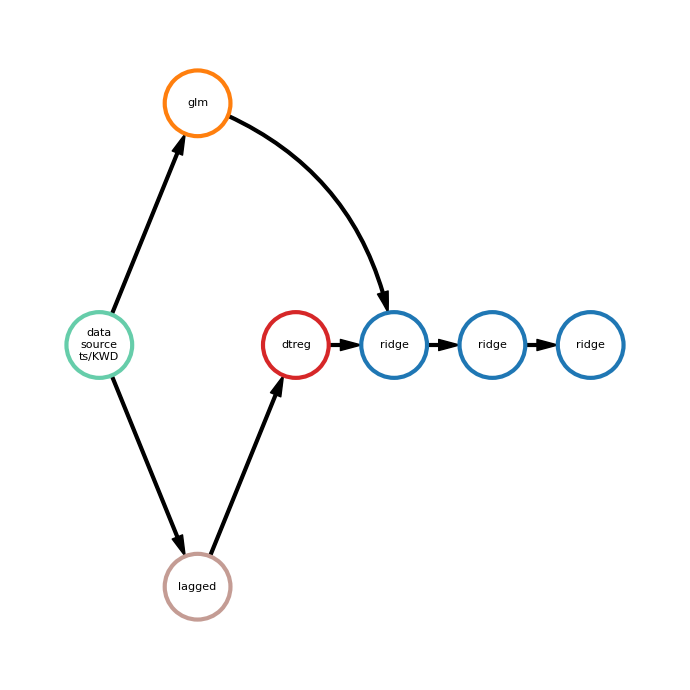

[60.18458388 60.31178016 60.49161424 60.66539826 60.81685462 60.95403977
 61.02927954 61.05580402 61.0057181  60.89125012 60.76541159 60.63410491
 60.53837664 60.50005766 60.49475561 60.55008766 60.63083859 60.70164195
 60.7942631 ]
{'mae': 0.878, 'mape': 0.015}


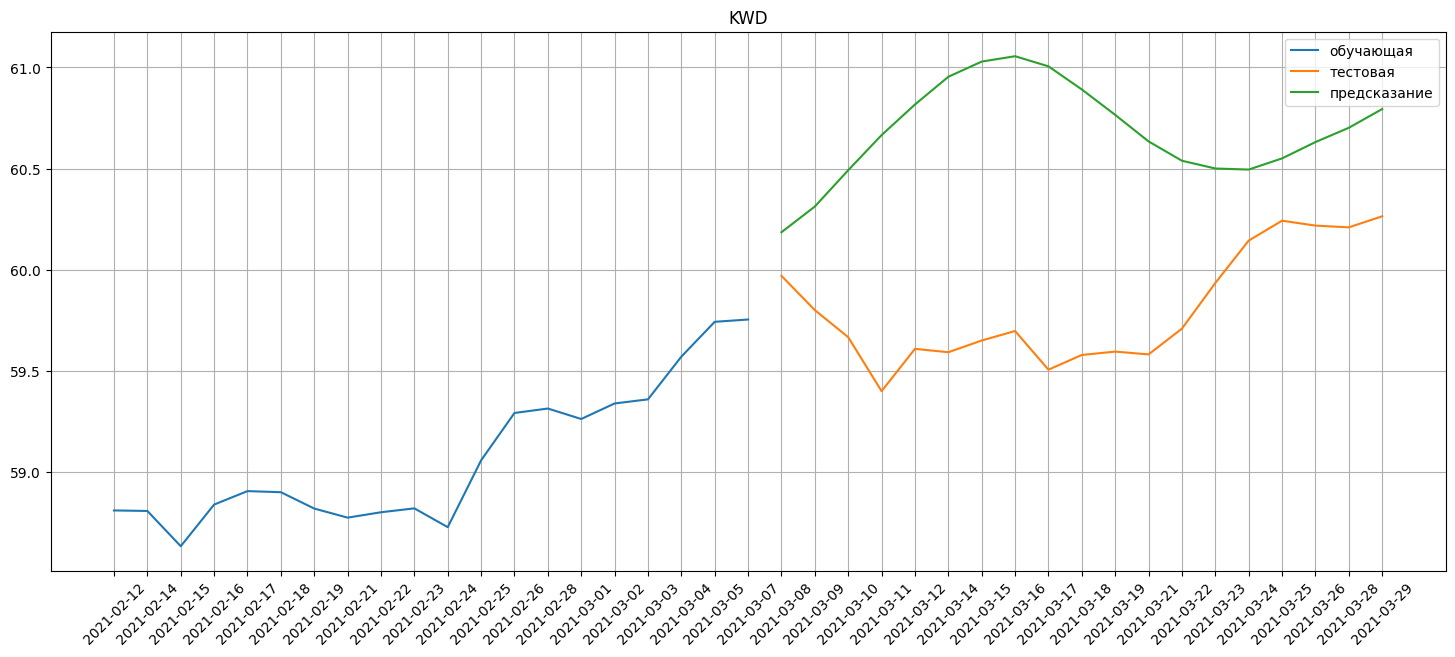


======================================== AED ========================================
2023-11-08 11:53:15,000 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.0 MiB
2023-11-08 11:53:15,013 - ApiComposer - Initial pipeline was fitted in 11.3 sec.
2023-11-08 11:53:15,018 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 11:53:15,037 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-08

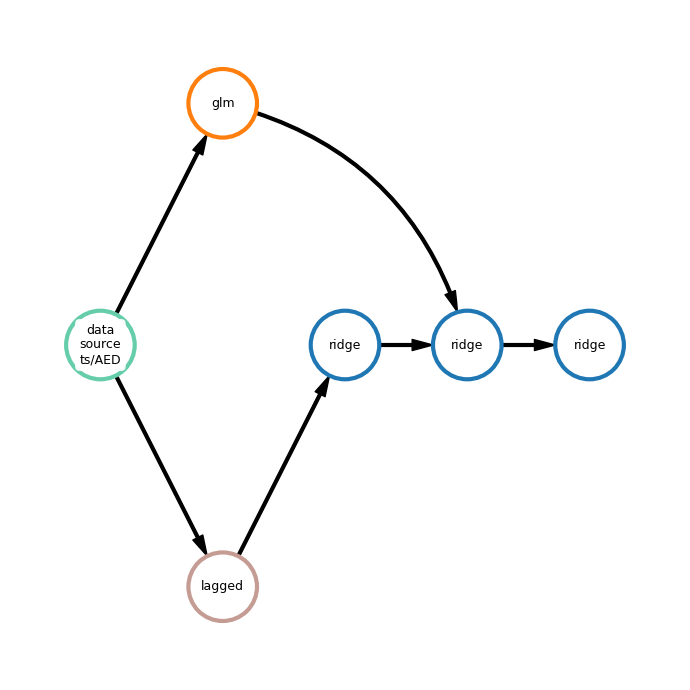

[5.27924582 5.27930955 5.27923759 5.27914853 5.2790365  5.27883854
 5.27864356 5.27852644 5.2784353  5.27834383 5.27825051 5.27809212
 5.27793883 5.27782962 5.27767996]
{'mae': 0.07, 'mape': 0.013}


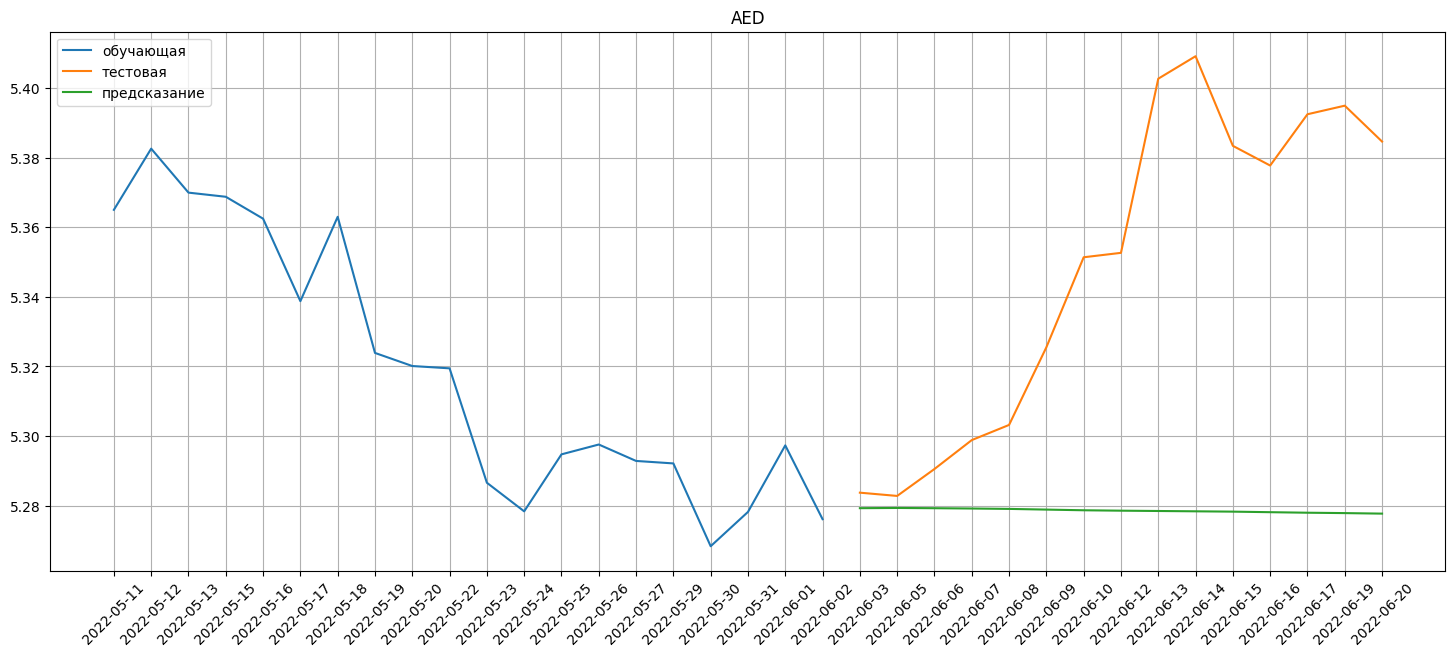


======================================== DKK ========================================
2023-11-08 11:56:52,637 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.1 MiB
2023-11-08 11:56:52,641 - ApiComposer - Initial pipeline was fitted in 15.3 sec.
2023-11-08 11:56:52,644 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 11:56:52,662 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-08

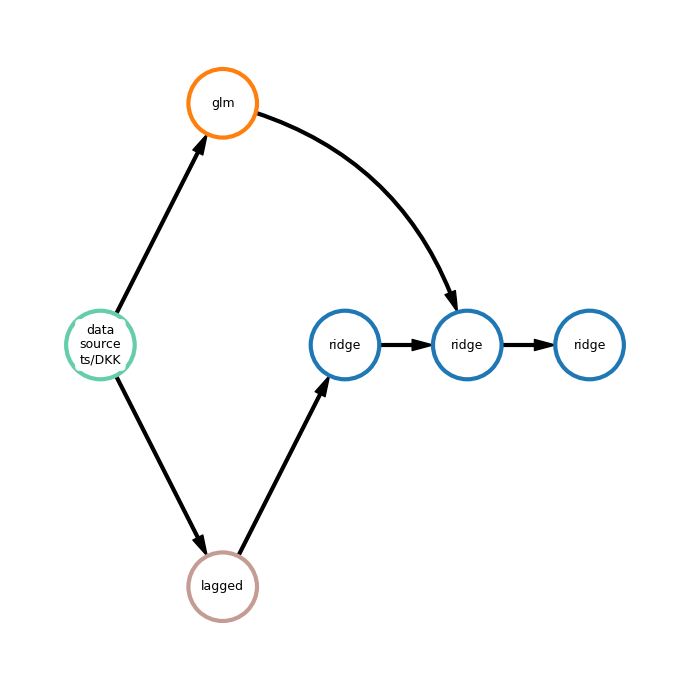

[3.11413341 3.11432706 3.11452716 3.11473397 3.11493203 3.11512872
 3.115322  ]
{'mae': 0.013, 'mape': 0.004}


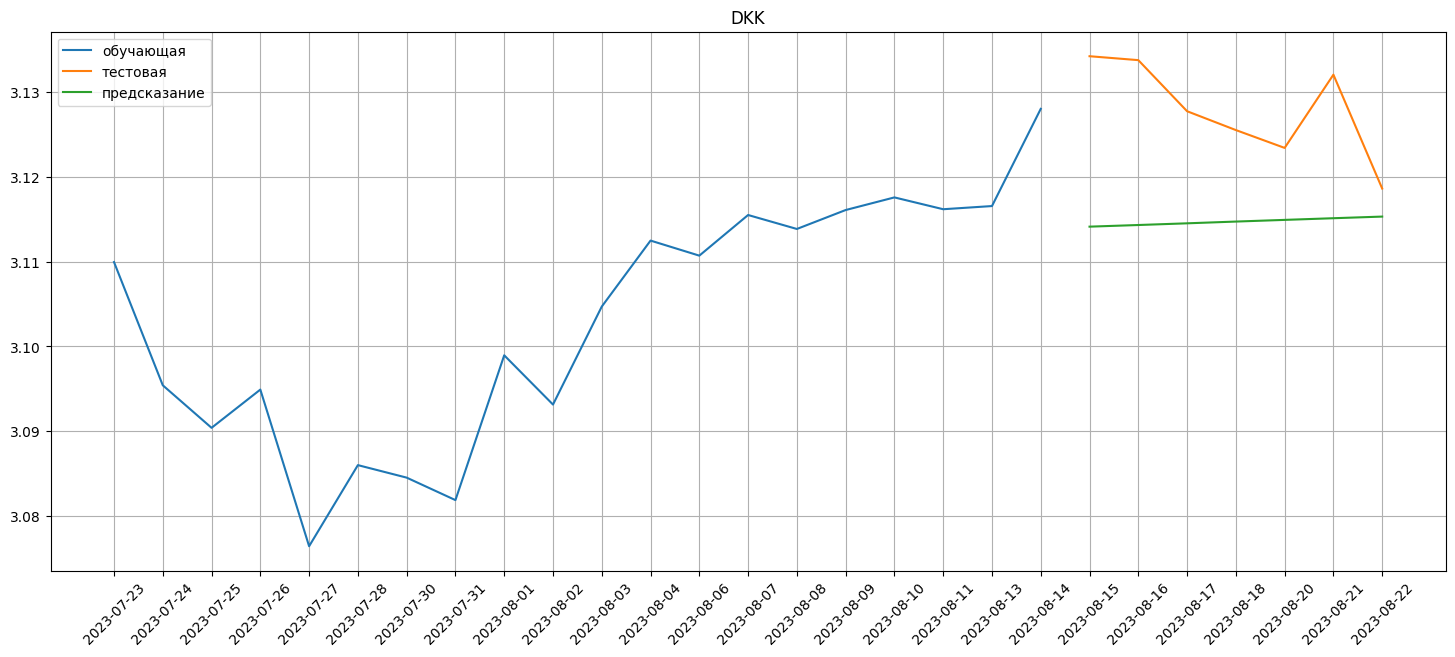


======================================== AUD ========================================
2023-11-08 12:00:20,353 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.8 MiB
2023-11-08 12:00:20,370 - ApiComposer - Initial pipeline was fitted in 11.4 sec.
2023-11-08 12:00:20,374 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 12:00:20,397 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 11 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-0

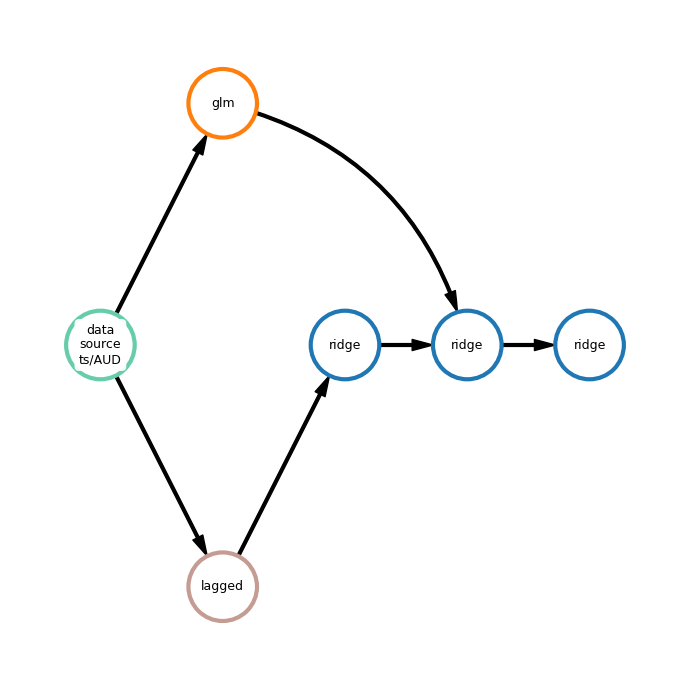

[14.18458931 14.19809743 14.2199968  14.2467219  14.27520802 14.30169609
 14.32227893 14.33498881 14.3374671  14.33196247 14.32147256 14.31076744]
{'mae': 0.089, 'mape': 0.006}


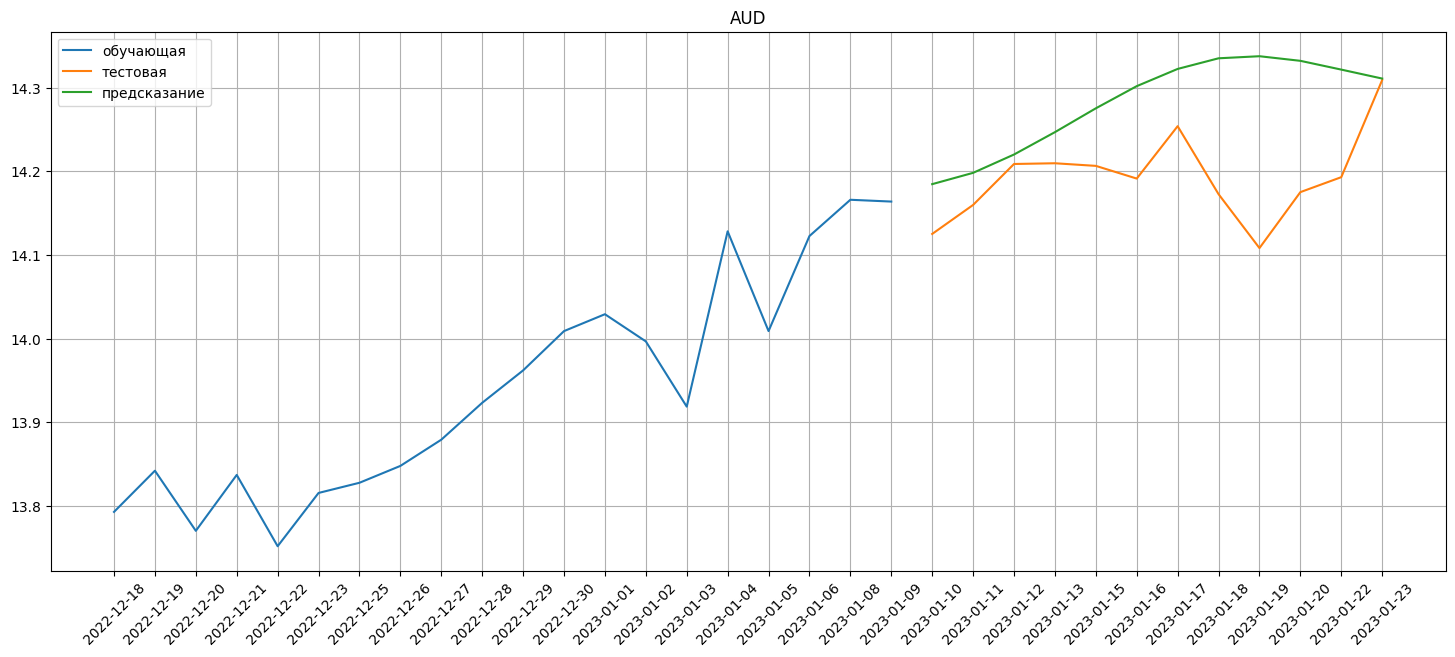


======================================== TRY ========================================
2023-11-08 12:11:56,632 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.1 MiB
2023-11-08 12:11:56,638 - ApiComposer - Initial pipeline was fitted in 7.1 sec.
2023-11-08 12:11:56,642 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 12:11:56,661 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 8 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-08 

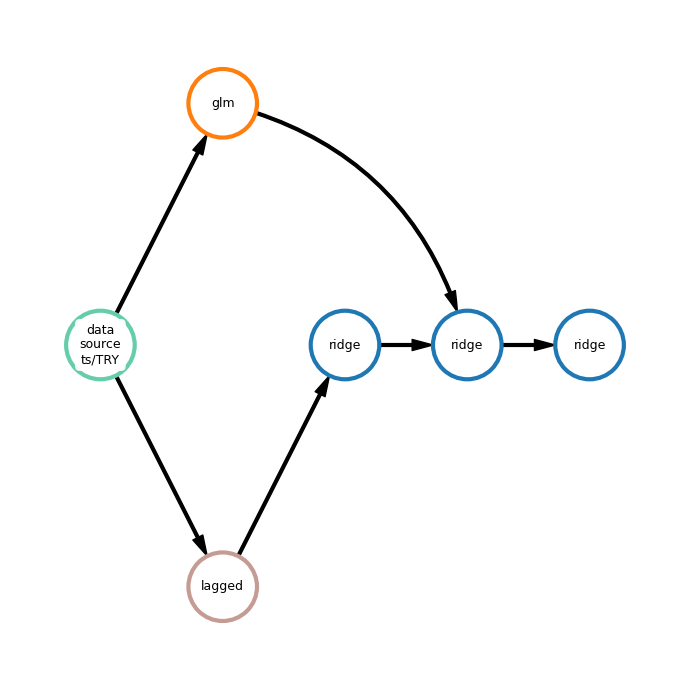

[1.89477289 1.89313681 1.8914577  1.88983339]
{'mae': 0.007, 'mape': 0.004}


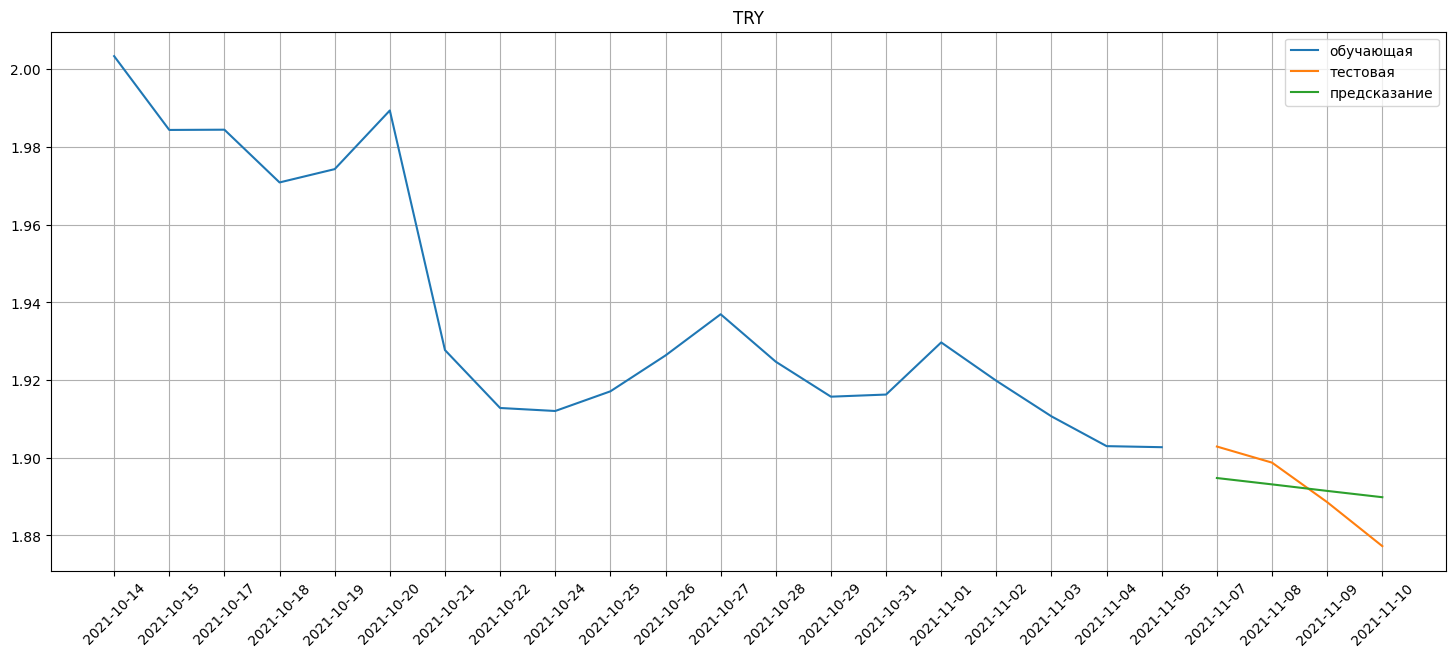


======================================== CLP ========================================
2023-11-08 12:20:17,699 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.9 MiB
2023-11-08 12:20:17,706 - ApiComposer - Initial pipeline was fitted in 9.2 sec.
2023-11-08 12:20:17,712 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 12:20:17,732 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 6 min. Set of candidate models: ['ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'locf', 'smoothing', 'ets', 'lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'lasso', 'diff_filter', 'cut', 'scaling', 'gaussian_filter', 'locf', 'linear', 'dtreg', 'smoothing', 'ets', 'lagged', 'adareg', 'ransac_non_lin_reg', 'rfr', 'normalization', 'ar', 'sparse_lagged', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'ts_naive_average', 'pca'].
2023-11-08 

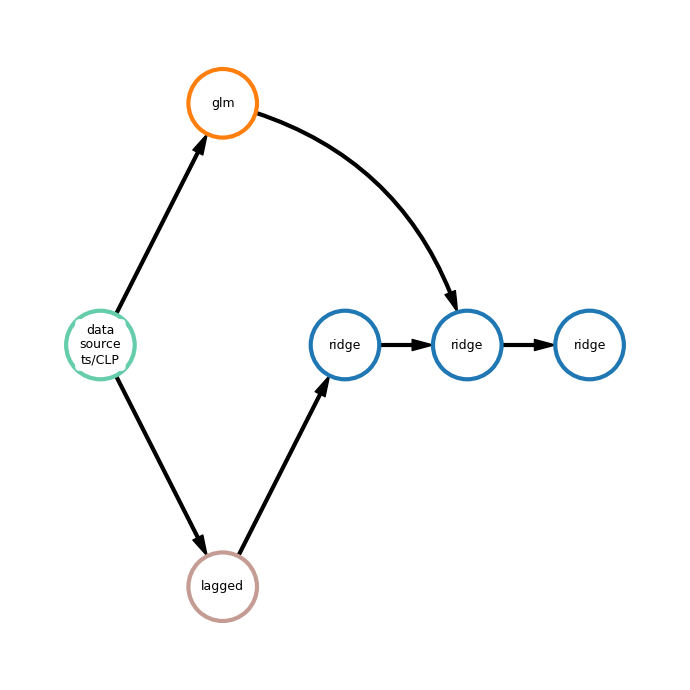

[0.02435621 0.02435579 0.02435532 0.02435496 0.02435467 0.02435449
 0.02435429 0.02435418 0.02435412 0.0243541  0.02435411 0.02435396
 0.02435378 0.02435358 0.02435346 0.02435304 0.02435255 0.02435184
 0.02435114]
{'mae': 0.001, 'mape': 0.053}


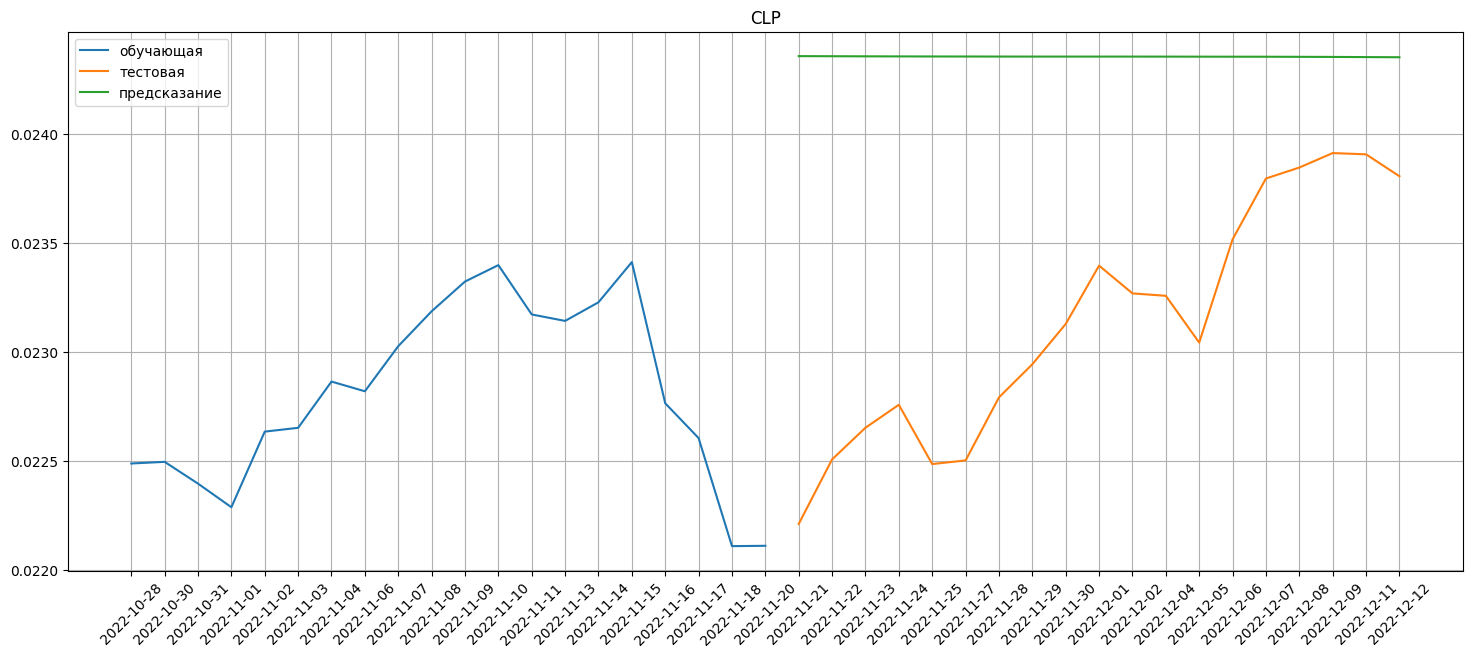


======================================== KRW ========================================
2023-11-08 12:26:42,575 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.6 MiB
2023-11-08 12:26:42,579 - ApiComposer - Initial pipeline was fitted in 9.1 sec.
2023-11-08 12:26:42,584 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 12:26:42,603 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 18 min. Set of candidate models: ['stl_arima', 'ar', 'sparse_lagged', 'cut', 'diff_filter', 'glm', 'clstm', 'gaussian_filter', 'locf', 'smoothing', 'polyfit', 'lagged', 'ets', 'ts_naive_average', 'arima', 'stl_arima', 'lasso', 'diff_filter', 'isolation_forest_reg', 'dtreg', 'smoothing', 'lagged', 'ransac_non_lin_reg', 'rfr', 'ar', 'ransac_lin_reg', 'sgdr', 'glm', 'ridge', 'polyfit', 'svr', 'poly_features', 'exog_ts', 'ts_naive_average', 'gaussian_filter', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 12:36:58,743 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:16<?, ?gen/s]

2023-11-08 12:36:58,775 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-08 12:37:37,956 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [adareg, ridge, polyfit, data_source_ts/KRW, ridge, lagged, linear, decompose]}
adareg - {}
ridge - {}
polyfit - {'degree': 2}
data_source_ts/KRW - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.000
100%|██████████| 10/10 [07:43<00:00, 46.40s/trial, best loss: 0.00014412702705957864]
2023-11-08 12:45:21,980 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-08 12:46:06,823 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [adareg, ridge, polyfit, data_source_ts/KRW, ridge, lagged, linear, decompose]}
adareg - {}
ridge - {}
polyfit - {'degree': 2}
data_source_ts/KRW - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-08 12:46:06,826 - PipelineTuner - Final metric: 0.000
2023-11-08 12:46:06,831 - ApiComposer - Hyperparameters tuning finished
2023-11-08 12:46:07,258 - ApiCom

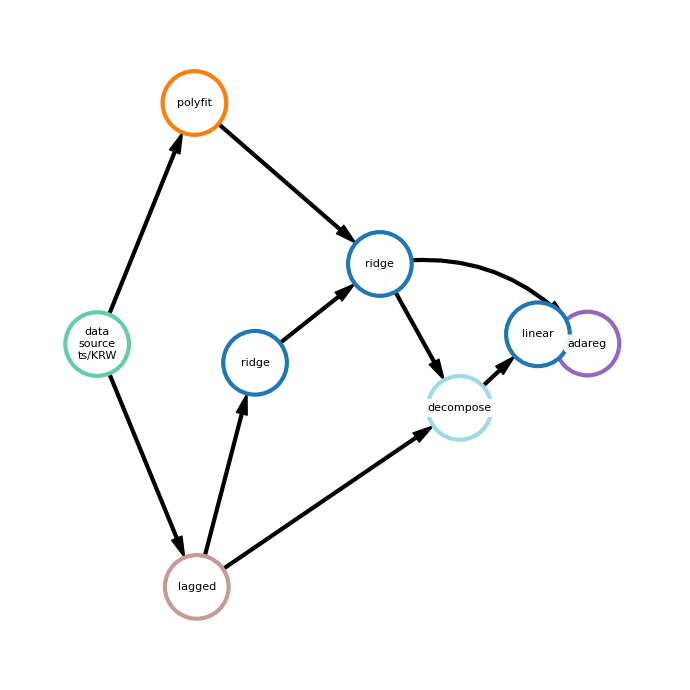

[0.01544836 0.01550007 0.01547676 0.01551927 0.01553834 0.01559531
 0.01559079 0.0156256  0.01554816 0.01557993 0.01554788 0.01554984
 0.01561364 0.01563639 0.01566465 0.01555612 0.01563918 0.01566919
 0.01564857]
{'mae': 0.0, 'mape': 0.011}


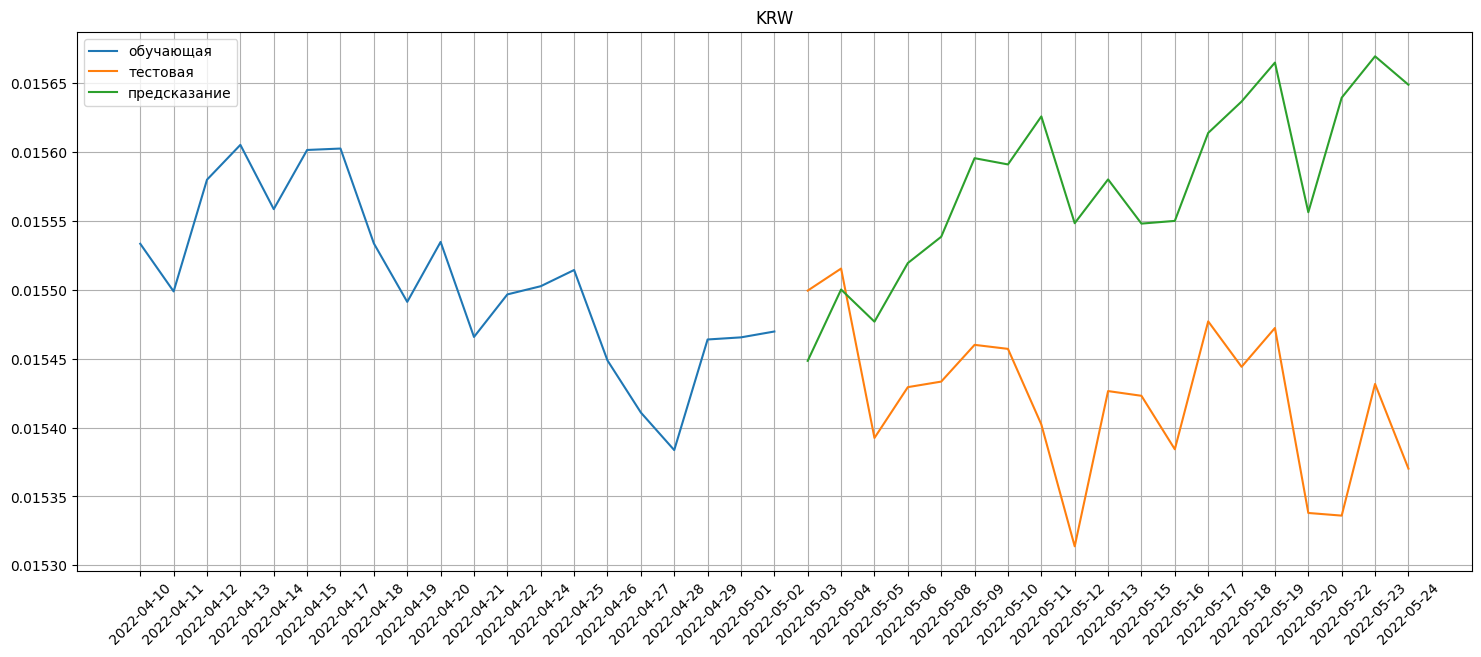

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
5,"(2023, 11, 5, 19, 5, 28, 6, 309, 0)",ARS,7,562,58,0.006
6,"(2023, 11, 5, 20, 6, 41, 6, 309, 0)",HUF,8,905,18,0.009
7,"(2023, 11, 5, 20, 25, 59, 6, 309, 0)",JPY,14,18,3,0.024
8,"(2023, 11, 5, 20, 30, 50, 6, 309, 0)",JPY,3,647,57,0.007
9,"(2023, 11, 5, 21, 31, 0, 6, 309, 0)",PKR,2,751,41,0.001


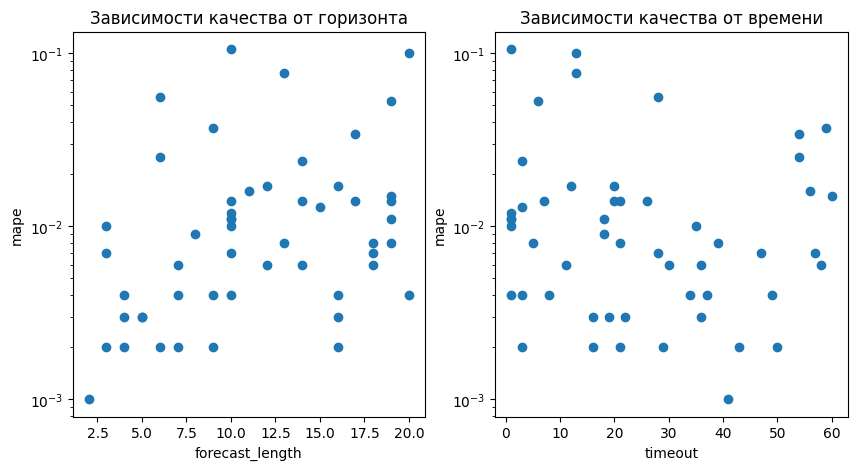

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()